In [68]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [69]:
df_raw = pd.read_csv('Data\SEER_Final_Data_vf1.csv')

C:\Users\yuyum\AppData\Local\Temp\ipykernel_54780\1586102749.py:1: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('Data\SEER_Final_Data_vf1.csv')


In [70]:
df = df_raw.copy()

In [71]:
display(df.head(2), df.shape)

,Patient ID,Age recode with <1 year olds,Marital status at diagnosis,Histologic Type ICD-O-3,Year of diagnosis,Sex,"Race recode (W, B, AI, API)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)","Derived AJCC Stage Group, 7th ed (2010-2015)",Derived SEER Combined T (2016-2017),Derived SEER Combined N (2016-2017),Derived SEER Combined M (2016-2017),Derived SEER Cmb Stg Grp (2016-2017),Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),"Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Scope Reg LN Sur (2003+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),CS tumor size (2004-2015),Tumor Size Summary (2016+),Survival months
0,801,65-69 years,Widowed,8140,2010,Female,Black,T1b,N0,M0,IA,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),No/Unknown,None/Unknown,NaN,No,No,No,No,30,Blank(s),0029
1,3458,75-79 years,Divorced,8010,2010,Male,White,T3,N3,M1b,IV,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),No/Unknown,None/Unknown,NaN,Yes,No,No,No,80,Blank(s),0001


(314191, 29)

In [72]:
df['Year of diagnosis'].value_counts(dropna=False)

Year of diagnosis
2010    35724
2012    35039
2011    34738
2013    34416
2014    34161
2015    32738
2016    31007
2017    28930
2018    25741
2019    21697
Name: count, dtype: int64

In [73]:
df.dtypes

Patient ID                                       int64
Age recode with <1 year olds                    object
Marital status at diagnosis                     object
Histologic Type ICD-O-3                          int64
Year of diagnosis                                int64
Sex                                             object
Race recode (W, B, AI, API)                     object
Derived AJCC T, 7th ed (2010-2015)              object
Derived AJCC N, 7th ed (2010-2015)              object
Derived AJCC M, 7th ed (2010-2015)              object
Derived AJCC Stage Group, 7th ed (2010-2015)    object
Derived SEER Combined T (2016-2017)             object
Derived SEER Combined N (2016-2017)             object
Derived SEER Combined M (2016-2017)             object
Derived SEER Cmb Stg Grp (2016-2017)            object
Derived EOD 2018 T (2018+)                      object
Derived EOD 2018 N (2018+)                      object
Derived EOD 2018 M (2018+)                      object
Derived EO

## Data Cleaning

Filter by the ICD-O-3 code, only keep SCLC

In [74]:
sclc_codes = [8002, 8041, 8042, 8043, 8044, 8045]

# only keep Histologic Type ICD-O-3  that bwtween 8002 and 8045
df_filtered = df[df['Histologic Type ICD-O-3'].isin(sclc_codes)].copy()

In [75]:
df_filtered['Histologic Type ICD-O-3'].value_counts(dropna=False)

Histologic Type ICD-O-3
8041    44344
8045      740
8042      440
8044       80
8043       26
8002        8
Name: count, dtype: int64

In [76]:
display(df_filtered.head(2), df_filtered.shape)

,Patient ID,Age recode with <1 year olds,Marital status at diagnosis,Histologic Type ICD-O-3,Year of diagnosis,Sex,"Race recode (W, B, AI, API)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)","Derived AJCC Stage Group, 7th ed (2010-2015)",Derived SEER Combined T (2016-2017),Derived SEER Combined N (2016-2017),Derived SEER Combined M (2016-2017),Derived SEER Cmb Stg Grp (2016-2017),Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),"Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Scope Reg LN Sur (2003+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),CS tumor size (2004-2015),Tumor Size Summary (2016+),Survival months
24,617501,80-84 years,Married (including common law),8041,2010,Male,White,TX,N1,M0,UNK Stage,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Yes,None/Unknown,NaN,No,No,No,No,999,Blank(s),0003
26,194350,75-79 years,Married (including common law),8041,2010,Female,Black,T4,N1,M1b,IV,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Yes,Beam radiation,NaN,No,No,No,No,46,Blank(s),0014


(45638, 29)

In [77]:
df_filtered_test = df_filtered.copy()

T, N, M Transformation

In [78]:
# Logic to combine the columns
df_filtered_test['T'] = df_filtered_test['Derived AJCC T, 7th ed (2010-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2016, 2017), 'T'] = df_filtered_test['Derived SEER Combined T (2016-2017)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'] >= 2018, 'T'] = df_filtered_test['Derived EOD 2018 T (2018+)']

df_filtered_test['N'] = df_filtered_test['Derived AJCC N, 7th ed (2010-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2016, 2017), 'N'] = df_filtered_test['Derived SEER Combined N (2016-2017)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'] >= 2018, 'N'] = df_filtered_test['Derived EOD 2018 N (2018+)']

df_filtered_test['M'] = df_filtered_test['Derived AJCC M, 7th ed (2010-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2016, 2017), 'M'] = df_filtered_test['Derived SEER Combined M (2016-2017)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'] >= 2018, 'M'] = df_filtered_test['Derived EOD 2018 M (2018+)']

# Dropping old columns
columns_to_drop = [
    'Derived AJCC T, 7th ed (2010-2015)',
    'Derived AJCC N, 7th ed (2010-2015)',
    'Derived AJCC M, 7th ed (2010-2015)',
    'Derived SEER Combined T (2016-2017)',
    'Derived SEER Combined N (2016-2017)',
    'Derived SEER Combined M (2016-2017)',
    'Derived EOD 2018 T (2018+)',
    'Derived EOD 2018 N (2018+)',
    'Derived EOD 2018 M (2018+)'
]

df_filtered_test.drop(columns=columns_to_drop, inplace=True)



In [79]:
display(df_filtered_test.head(2), df_filtered_test.shape)

,Patient ID,Age recode with <1 year olds,Marital status at diagnosis,Histologic Type ICD-O-3,Year of diagnosis,Sex,"Race recode (W, B, AI, API)","Derived AJCC Stage Group, 7th ed (2010-2015)",Derived SEER Cmb Stg Grp (2016-2017),Derived EOD 2018 Stage Group (2018+),"Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Scope Reg LN Sur (2003+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),CS tumor size (2004-2015),Tumor Size Summary (2016+),Survival months,T,N,M
24,617501,80-84 years,Married (including common law),8041,2010,Male,White,UNK Stage,Blank(s),Blank(s),Yes,None/Unknown,NaN,No,No,No,No,999,Blank(s),0003,TX,N1,M0
26,194350,75-79 years,Married (including common law),8041,2010,Female,Black,IV,Blank(s),Blank(s),Yes,Beam radiation,NaN,No,No,No,No,46,Blank(s),0014,T4,N1,M1b


(45638, 23)

In [80]:
def replace_first_char(row, column_name):
    # Check if the value is a string and starts with 'p' or 'c'
    if isinstance(row, str) and row[0] in ['p', 'c']:
        return column_name + row[1:]
    else:
        return row

# Applying the function to each column
df_filtered_test['T'] = df_filtered_test['T'].apply(lambda x: replace_first_char(x, 'T'))
df_filtered_test['N'] = df_filtered_test['N'].apply(lambda x: replace_first_char(x, 'N'))
df_filtered_test['M'] = df_filtered_test['M'].apply(lambda x: replace_first_char(x, 'M'))



In [81]:
df_filtered_test['T'].value_counts(dropna=False).sort_index()

T
88                   10
Blank(s)            187
Not applicable       32
T0                  474
T1                   95
T1A                 546
T1B                 504
T1NOS                20
T1a                1571
T1b                1726
T1c                 429
T1mi                 97
T2                  404
T2A                 927
T2B                 591
T2NOS              1216
T2a                4324
T2b                2035
T3                 8148
T4                14641
TX                 7659
Tis                   2
Name: count, dtype: int64

In [82]:
df_filtered_test['N'].value_counts(dropna=False).sort_index()

N
88                   10
Blank(s)            187
N0                 6213
N1                 3211
N2                22934
N3                 9834
NX                 3217
Not applicable       32
Name: count, dtype: int64

In [83]:
df_filtered_test['M'].value_counts(dropna=False).sort_index()

M
88                   10
Blank(s)            187
M0                12969
M1                 1074
M1A                 915
M1B                4822
M1NOS               321
M1a                3913
M1b               18002
M1c                3393
Not applicable       32
Name: count, dtype: int64

In [84]:
# Dropping rows when T = '88', 'Blank(s)', 'Not applicable', 'TX', 'Tis'
df_filtered_test = df_filtered_test[~df_filtered_test['T'].isin(['88', 'Blank(s)', 'Not applicable', 'TX', 'Tis', 'T0'])].copy()

# Dropping rows when N = '88', 'Blank(s)', 'Not applicable', 'NX'
df_filtered_test = df_filtered_test[~df_filtered_test['N'].isin(['88', 'Blank(s)', 'Not applicable', 'NX'])].copy()

# Dropping rows when M = '88', 'Blank(s)', 'Not applicable'
df_filtered_test = df_filtered_test[~df_filtered_test['M'].isin(['88', 'Blank(s)', 'Not applicable'])].copy()

In [85]:
df_filtered_test2 = df_filtered_test.copy()

In [86]:
def extract_main_category(value):
    if isinstance(value, str):
        # Find the first occurrence of a digit in the string
        for i, char in enumerate(value):
            if char.isdigit():
                # Return the string up to the second digit (inclusive)
                return value[:i+1]
    return value

# Apply the function to the 'T' column
df_filtered_test2['T'] = df_filtered_test2['T'].apply(extract_main_category)

# Display the updated DataFrame
print(df_filtered_test2['T'].value_counts())

T
T4    14183
T2     9260
T3     7924
T1     4894
Name: count, dtype: int64


In [87]:
# Apply the function to the 'N' column
df_filtered_test2['N'] = df_filtered_test2['N'].apply(extract_main_category)

# Display the updated DataFrame
print(df_filtered_test2['N'].value_counts())

N
N2    19756
N3     8529
N0     5253
N1     2723
Name: count, dtype: int64


In [88]:
# Apply the function to the 'M' column
df_filtered_test2['M'] = df_filtered_test2['M'].apply(extract_main_category)

# Display the updated DataFrame
print(df_filtered_test2['M'].value_counts())

M
M1    25686
M0    10575
Name: count, dtype: int64


Stage Transformation

In [89]:
# Logic to combine the columns
df_filtered_test2['SEER Combined/AJCC Cancer Stage Group'] = df_filtered_test2['Derived AJCC Stage Group, 7th ed (2010-2015)']
df_filtered_test2.loc[df_filtered_test2['Year of diagnosis'].between(2016, 2017), 'SEER Combined/AJCC Cancer Stage Group'] = df_filtered_test2['Derived SEER Cmb Stg Grp (2016-2017)']
df_filtered_test2.loc[df_filtered_test2['Year of diagnosis'] >= 2018, 'SEER Combined/AJCC Cancer Stage Group'] = df_filtered_test2['Derived EOD 2018 Stage Group (2018+)']

# dropping old columns
columns_to_drop = [
    'Derived AJCC Stage Group, 7th ed (2010-2015)',
    'Derived SEER Cmb Stg Grp (2016-2017)',
    'Derived EOD 2018 Stage Group (2018+)'
]

df_filtered_test2.drop(columns=columns_to_drop, inplace=True)


In [90]:
def categorize_stage(df, column_name):
    # Define the mapping for each stage to its group
    stage_mapping = {
        '1A': 'I', '1A1': 'I', '1A2': 'I', '1A3': 'I', '1B': 'I', 'IA': 'I', 'IB': 'I',
        '2': 'II', '2A': 'II', '2B': 'II', 'II': 'II', 'IIA': 'II', 'IIB': 'II',
        '3A': 'III', '3B': 'III', '3C': 'III', 'IIIA': 'III', 'IIIB': 'III',
        '4': 'IV', '4A': 'IV', '4B': 'IV', 'IV': 'IV',
        '99': 'UNK', 'UNK Stage': 'UNK'
    }

    # Apply the mapping to the specified column
    df['Grouped Stage'] = df[column_name].map(stage_mapping).fillna('UNK')

    return df


df_filtered_test2 = categorize_stage(df_filtered_test2, 'SEER Combined/AJCC Cancer Stage Group')

df_filtered_test2['Grouped Stage'].value_counts(dropna=False).sort_index()


Grouped Stage
I       1158
II      1104
III     8274
IV     25686
UNK       39
Name: count, dtype: int64

In [91]:
# drop old column
df_filtered_test2.drop(columns='SEER Combined/AJCC Cancer Stage Group', inplace=True)

# drop UNK rows
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Grouped Stage'] != 'UNK'].copy()

Race recode

In [92]:
# drop the 'Unknown' in Race recode (W, B, AI, API)
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Race recode (W, B, AI, API)']!='Unknown'].copy()

# rename the column name from Race recode (W, B, AI, API) to Race
df_filtered_test2.rename(columns={'Race recode (W, B, AI, API)': 'Race'}, inplace=True)


Chemotherapy

In [93]:
df_filtered_test2['Chemotherapy recode (yes, no/unk)'].value_counts(dropna=False)

Chemotherapy recode (yes, no/unk)
Yes           25278
No/Unknown    10920
Name: count, dtype: int64

In [94]:
# map Chemotherapy recode (yes, no/unk) into 1: Yes and 0:No/Unknown
df_filtered_test2['Chemotherapy'] = df_filtered_test2['Chemotherapy recode (yes, no/unk)'].map({'Yes': 1, 'No/Unknown': 0})

# drop original column
df_filtered_test2.drop(columns=['Chemotherapy recode (yes, no/unk)'], inplace=True)

Radiation recode

In [95]:
df_filtered_test2['Radiation recode'].value_counts(dropna=False)

Radiation recode
None/Unknown                                             18786
Beam radiation                                           16105
Refused (1988+)                                            708
Recommended, unknown if administered                       377
Radiation, NOS  method or source not specified             191
Radioactive implants (includes brachytherapy) (1988+)       15
Combination of beam with implants or isotopes               10
Radioisotopes (1988+)                                        6
Name: count, dtype: int64

In [96]:
def map_radiation_values(value):
    # Define the values to be mapped to 0
    values_for_zero = ['None/Unknown', 'Refused (1988+)', 'Recommended, unknown if administered']
    
    # Check if the value is in the list for 0, else return 1
    return 0 if value in values_for_zero else 1

# Apply the function to the 'Radiation Recode' column
df_filtered_test2['Radiation recode'] = df_filtered_test2['Radiation recode'].apply(map_radiation_values)

# Display the updated DataFrame
print(df_filtered_test2['Radiation recode'].value_counts())


Radiation recode
0    19871
1    16327
Name: count, dtype: int64


Marital status at diagnosis

In [97]:
df_filtered_test2['Marital status at diagnosis'].value_counts(dropna=False)

Marital status at diagnosis
Married (including common law)    17362
Widowed                            6392
Divorced                           5353
Single (never married)             5149
Unknown                            1349
Separated                           478
Unmarried or Domestic Partner       115
Name: count, dtype: int64

In [98]:
def categorize_marital_status(df, column_name):
    # Define the mapping for each status to its group
    status_mapping = {
        'Married (including common law)': 'Married',
        'Unmarried or Domestic Partner': 'Married',  # Optional
        'Single (never married)': 'Single',
        'Separated': 'Single',  # Optional
        'Divorced': 'Single',   # Optional
        'Widowed': 'Single',    # Optional
        'Unknown': 'Unknown/Other'
    }

    # Apply the mapping to the specified column
    df['Grouped Marital Status'] = df[column_name].map(status_mapping).fillna('Unknown/Other')

    return df

# Apply the function to the 'Marital status at diagnosis' column
df_filtered_test2 = categorize_marital_status(df_filtered_test2, 'Marital status at diagnosis')

# drop old column
df_filtered_test2.drop(columns='Marital status at diagnosis', inplace=True)

# rename the 'Grouped Marital Status' column to 'Marital Status'
df_filtered_test2.rename(columns={'Grouped Marital Status': 'Marital Status'}, inplace=True)


In [99]:
df_filtered_test2['Marital Status'].value_counts(dropna=False)

Marital Status
Married          17477
Single           17372
Unknown/Other     1349
Name: count, dtype: int64

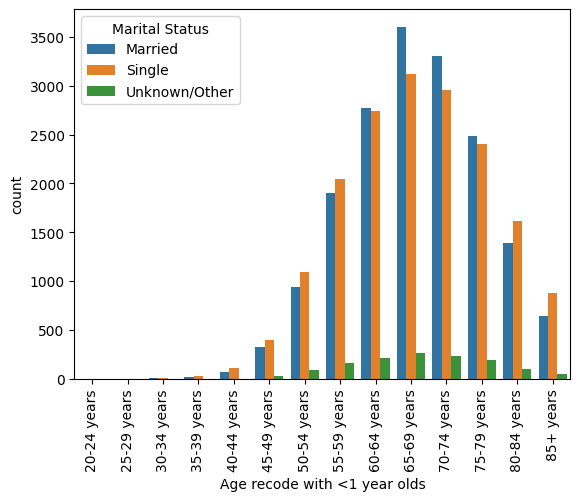

In [100]:
# build a countplot to have count of Grouped Marital Status for each age

sns.countplot(x='Age recode with <1 year olds', hue='Marital Status', data=df_filtered_test2, order=df_filtered_test2['Age recode with <1 year olds'].value_counts().sort_index().index)
plt.xticks(rotation=90)
plt.show()

In [101]:
# drop this column as well, we may need later.
df_filtered_test2.drop(columns='Marital Status', inplace=True)

SEER Combined Mets

In [102]:
df_filtered_test2['SEER Combined Mets at DX-bone (2010+)'].value_counts(dropna=False)

SEER Combined Mets at DX-bone (2010+)
No         26361
Yes         9222
Unknown      610
NaN            5
Name: count, dtype: int64

In [103]:
# drop Unknown and Nan in SEER Combined Mets at DX-bone (2010+)
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-bone (2010+)']!='Unknown'].copy()
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-bone (2010+)'].notna()].copy()


In [104]:
# drop Unknown and Nan in SEER Combined Mets at DX-brain (2010+)
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-brain (2010+)']!='Unknown'].copy()
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-brain (2010+)'].notna()].copy()

In [105]:
# drop Unknown and Nan in SEER Combined Mets at DX-liver (2010+)
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-liver (2010+)']!='Unknown'].copy()
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-liver (2010+)'].notna()].copy()

In [106]:
# drop Unknown and Nan in SEER Combined Mets at DX-lung (2010+)
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-lung (2010+)']!='Unknown'].copy()
df_filtered_test2 = df_filtered_test2[df_filtered_test2['SEER Combined Mets at DX-lung (2010+)'].notna()].copy()

Tumor size

In [107]:
# Logic to combine the columns
df_filtered_test2['Tumor Size'] = df_filtered_test2['CS tumor size (2004-2015)']
df_filtered_test2.loc[df_filtered_test2['Year of diagnosis'] >= 2016, 'Tumor Size'] = df_filtered_test2['Tumor Size Summary (2016+)']


# drop old columns
columns_to_drop = [
    'CS tumor size (2004-2015)',
    'Tumor Size Summary (2016+)'
]

df_filtered_test2.drop(columns=columns_to_drop, inplace=True)

In [108]:
df_filtered_test2['Tumor Size'].value_counts(dropna=False)

Tumor Size
999    5137
60      742
30      735
50      727
40      706
70      585
999     584
20      550
80      535
25      534
35      479
100     453
45      420
90      382
55      371
28      355
15      350
27      338
17      336
22      336
33      319
65      319
32      316
24      315
34      303
23      299
36      299
38      297
18      296
26      296
75      293
44      286
42      284
37      279
46      276
43      269
21      258
19      256
29      253
31      251
16      248
48      244
57      242
47      242
54      240
14      237
39      235
12      235
53      233
56      232
110     229
13      229
41      228
52      226
67      224
66      216
58      216
10      208
120     193
51      193
49      193
63      187
85      186
62      185
68      180
59      174
72      170
77      169
73      168
64      167
11      166
69      157
86      155
76      153
74      149
78      148
61      144
71      141
83      131
84      130
95      126
93      115
87   

In [109]:
# Convert the 'CS Tumor Size (2004-2015)' column to strings
df_filtered_test2['Tumor Size'] = df_filtered_test2['Tumor Size'].astype(str)

# Strip leading zeros from the strings
df_filtered_test2['Tumor Size'] = df_filtered_test2['Tumor Size'].str.lstrip('0')

# Replace empty strings with '0' (for cases where original value was '000')
df_filtered_test2['Tumor Size'].replace('', '0', inplace=True)

# Filter the DataFrame to keep only valid numeric values
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Tumor Size'].apply(lambda x: x.isnumeric() and 1 <= int(x) <= 988 or x == '989')]

df_filtered_test2['Tumor Size'] = df_filtered_test2['Tumor Size'].astype(int)



RX Summ--Scope Reg LN Sur (2003+)

In [110]:
df_filtered_test2['RX Summ--Scope Reg LN Sur (2003+)'].value_counts(dropna=False)

RX Summ--Scope Reg LN Sur (2003+)
NaN                                                           22798
Biopsy or aspiration of regional lymph node, NOS               5131
4 or more regional lymph nodes removed                          457
1 to 3 regional lymph nodes removed                             334
Unknown or not applicable                                        89
Number of regional lymph nodes removed unknown                   72
Sentinel lymph node biopsy                                        5
Sentinel node biopsy and lym nd removed same/unstated time        2
Sentinel node biopsy and lym nd removed different times           1
Name: count, dtype: int64

In [111]:
# NaN and Unknown or not applicable will be 0, the rest will be 1
df_filtered_test2['Surgery'] = np.where(df_filtered_test2['RX Summ--Scope Reg LN Sur (2003+)'].isna() | 
                         (df_filtered_test2['RX Summ--Scope Reg LN Sur (2003+)'] == 'Unknown or not applicable'), 0, 1)

# drop old column
df_filtered_test2.drop(columns='RX Summ--Scope Reg LN Sur (2003+)', inplace=True)

df_filtered_test2['Surgery'].value_counts(dropna=False)

Surgery
0    22887
1     6002
Name: count, dtype: int64

Age recode with <1 year olds

In [112]:
df_filtered_test2['Age recode with <1 year olds'].value_counts(dropna=False).sort_index()

Age recode with <1 year olds
20-24 years       3
25-29 years       3
30-34 years      11
35-39 years      39
40-44 years     130
45-49 years     581
50-54 years    1669
55-59 years    3243
60-64 years    4584
65-69 years    5600
70-74 years    5225
75-79 years    4081
80-84 years    2474
85+ years      1246
Name: count, dtype: int64

In [113]:
# Define a mapping function
def group_ages(age):
    if age in ['20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years']:
        return '20-44 years'
    else:
        return age

# Apply the mapping function to the age column
df_filtered_test2['Age recode with <1 year olds'] = df_filtered_test2['Age recode with <1 year olds'].astype(str)
df_filtered_test2['Age'] = df_filtered_test2['Age recode with <1 year olds'].apply(group_ages)


In [114]:
# drop old column
df_filtered_test2.drop(columns='Age recode with <1 year olds', inplace=True)

In [115]:
df_final = df_filtered_test2.copy()

In [116]:
# binary encode the Histologic Type ICD-O-3, if it is 8045, then it is 1, else 0
df_final['Histologic Type ICD-O-3'] = df_final['Histologic Type ICD-O-3'].map({8045: 1, 8002: 0, 8041: 0, 8042: 0, 8043: 0, 8044: 0})

df_final['Histologic Type ICD-O-3'].value_counts(dropna=False)

Histologic Type ICD-O-3
0    28332
1      557
Name: count, dtype: int64

In [117]:
df_final = df_final[df_final['Survival months']!='Unknown']

In [118]:
df_final['Survival Months'] = df_final['Survival months'].astype(int)

# drop old column
df_final.drop(columns='Survival months', inplace=True)

In [119]:
display(df_final.head(2), df_final.shape)

,Patient ID,Histologic Type ICD-O-3,Year of diagnosis,Sex,Race,Radiation recode,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),T,N,M,Grouped Stage,Chemotherapy,Tumor Size,Surgery,Age,Survival Months
26,194350,0,2010,Female,Black,1,No,No,No,No,T4,N1,M1,IV,1,46,0,75-79 years,14
54,674026,0,2010,Female,White,0,No,No,No,No,T2,N2,M0,III,1,50,0,60-64 years,66


(28882, 19)

In [120]:
# write a loop to convert all the object columns to category
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].astype('category')

In [121]:
# save the final dataframe to csv
df_final.to_csv('Data\SEER_Final_Data_vf_cleaned.csv', index=False)

## Data Exploration

In [122]:
from utils.exploration import data_exploration

Year of diagnosis

Counts and percentages of unique values in Year of diagnosis:
                   Count  Percentage
Year of diagnosis                   
2014                3166   10.961845
2015                3160   10.941071
2017                3072   10.636383
2013                3059   10.591372
2012                2980   10.317845
2016                2918   10.103178
2010                2859    9.898899
2018                2726    9.438405
2011                2721    9.421093
2019                2221    7.689911


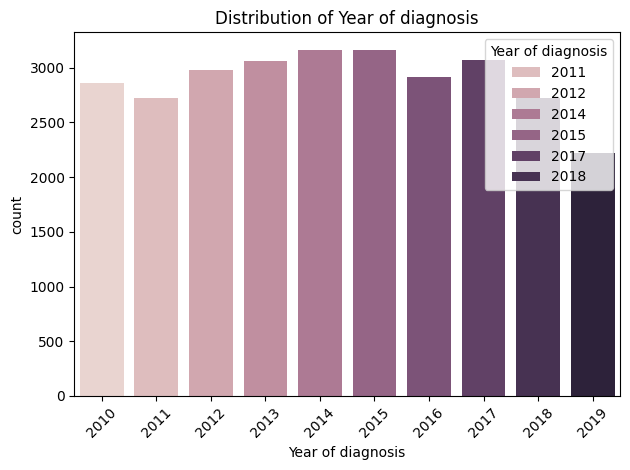

In [123]:
data_exploration(df_final, 'Year of diagnosis')

Survival Months

Mean of Survival Months: 9.67
Median of Survival Months: 7.00
Standard deviation of Survival Months: 11.46
Mode of Survival Months: 0
Number of outliers in Survival Months: 1488
Number of extreme outliers in Survival Months: 504


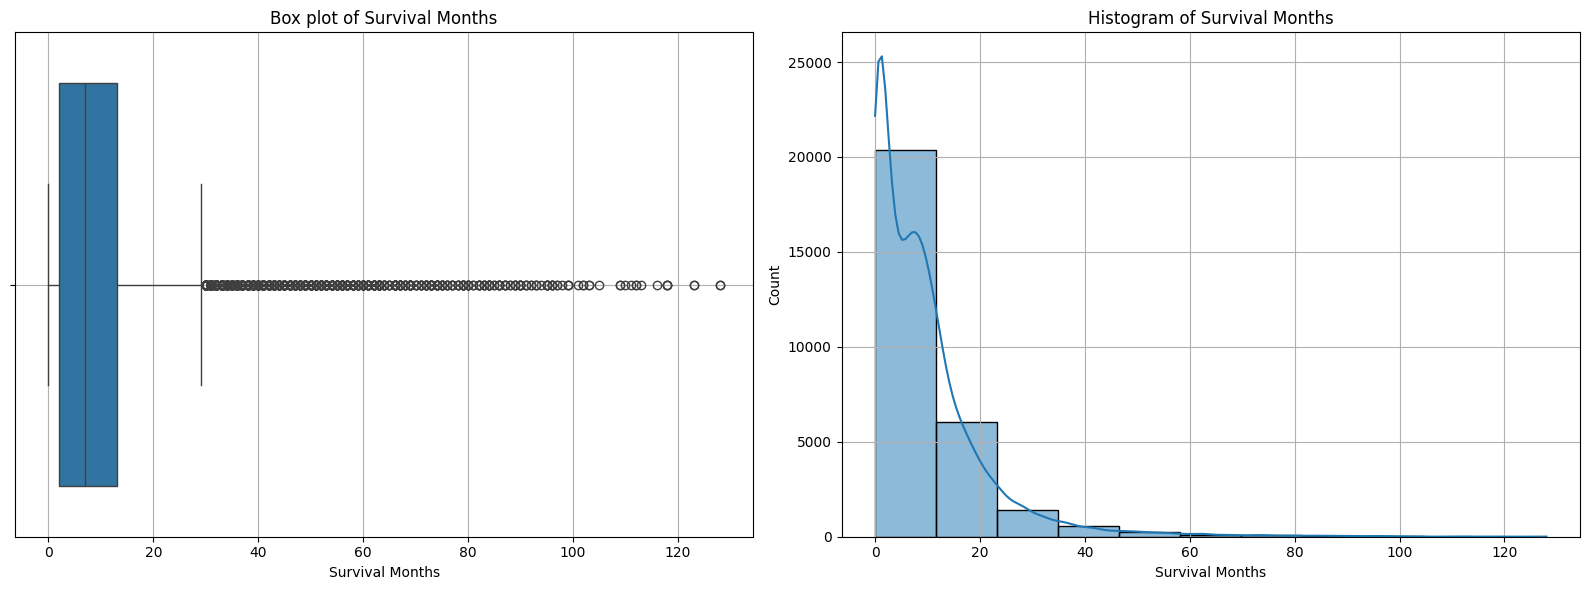

In [124]:
data_exploration(df_final, 'Survival Months')

In [125]:
# Define the bins and labels
bins = [0, 12, 24, float('inf')]  
labels = ['0-12 months', '12-24 months', 'Over 24 months']

# Use pd.cut to create the new column
df_final['Grouped Survival Months'] = pd.cut(df_final['Survival Months'], bins=bins, labels=labels, right=False)

# renname the column from Grouped Survival Months to Survival Months Group
df_final.rename(columns={'Grouped Survival Months': 'Survival Months Group'}, inplace=True)


Counts and percentages of unique values in Survival Months Group:
                       Count  Percentage
Survival Months Group                   
0-12 months            20389   70.594142
12-24 months            6029   20.874593
Over 24 months          2464    8.531265


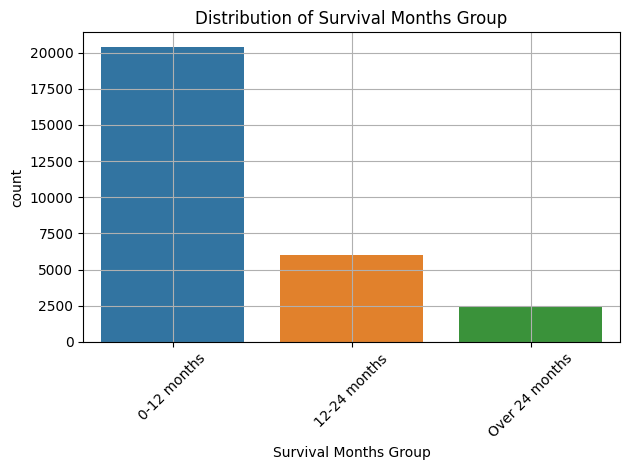

In [126]:
data_exploration(df_final, 'Survival Months Group')

Sex

Counts and percentages of unique values in Sex:
        Count  Percentage
Sex                      
Female  14532   50.315075
Male    14350   49.684925


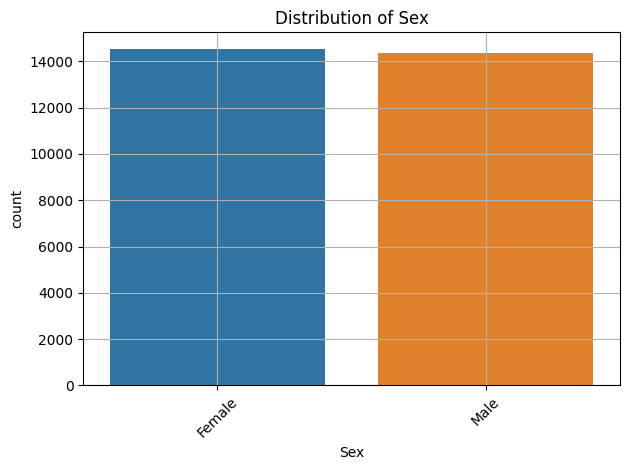

In [127]:
data_exploration(df_final, 'Sex')

Race

Counts and percentages of unique values in Race:
                               Count  Percentage
Race                                            
White                          25143   87.054221
Black                           2506    8.676684
Asian or Pacific Islander       1047    3.625095
American Indian/Alaska Native    186    0.644000


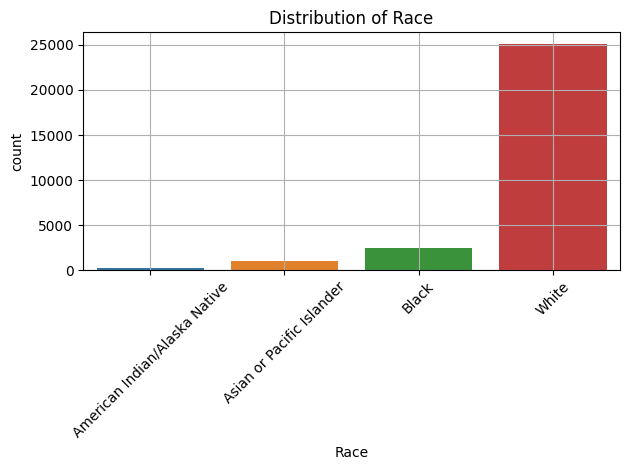

In [128]:
data_exploration(df_final,'Race')

In [129]:
# group the race into 3 groups, White, Black, Other
df_final['Race'] = df_final['Race'].map({'White': 'White', 'Black': 'Black', 'American Indian/Alaska Native': 'Other', 'Asian or Pacific Islander': 'Other'})


Counts and percentages of unique values in Race:
       Count  Percentage
Race                    
White  25143   87.054221
Black   2506    8.676684
Other   1233    4.269095


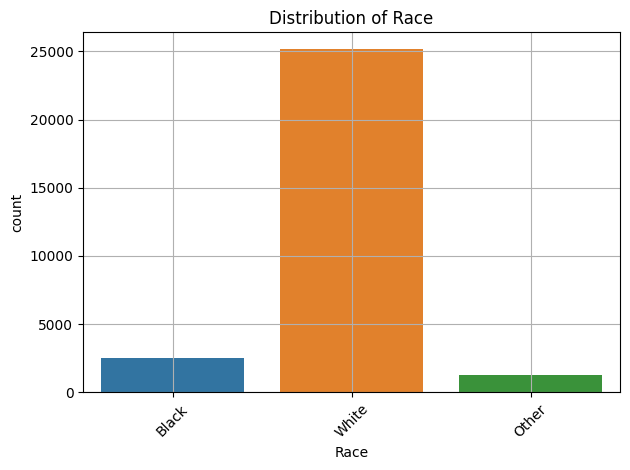

In [130]:
data_exploration(df_final,'Race')

Radiation recode

Counts and percentages of unique values in Radiation recode:
                  Count  Percentage
Radiation recode                   
0                 15252   52.807977
1                 13630   47.192023


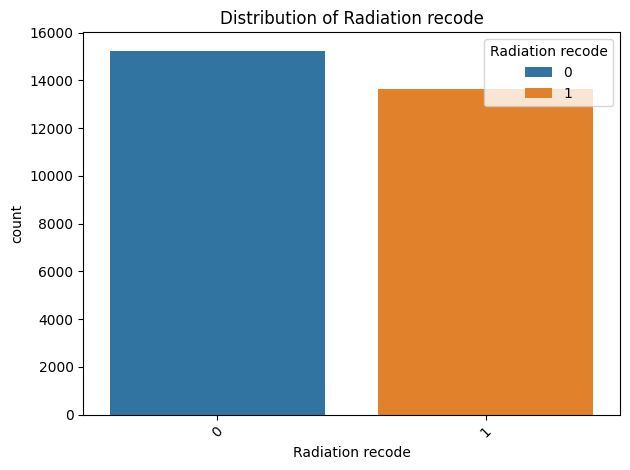

In [131]:
data_exploration(df_final,'Radiation recode')

SEER Combined Mets at DX-bone (2010+)

Counts and percentages of unique values in SEER Combined Mets at DX-bone (2010+):
                                       Count  Percentage
SEER Combined Mets at DX-bone (2010+)                   
No                                     21610   74.821688
Yes                                     7272   25.178312


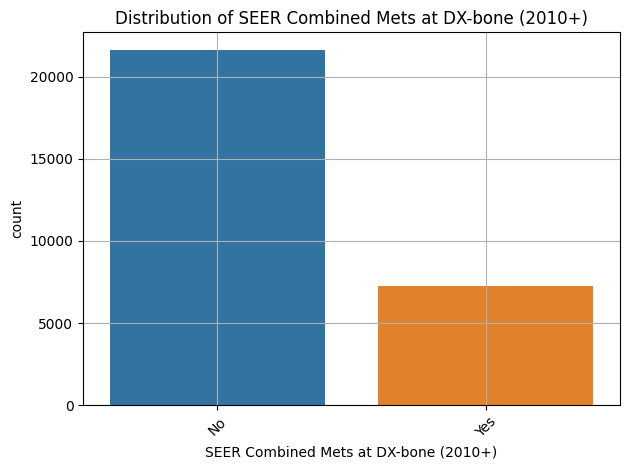

In [132]:
data_exploration(df_final,'SEER Combined Mets at DX-bone (2010+)')

In [133]:
# rename SEER Combined Mets at DX-bone (2010+) to Bone Metastasis
df_final.rename(columns={'SEER Combined Mets at DX-bone (2010+)': 'Bone Metastasis'}, inplace=True)

# map Bone Metastasis to 1: Yes and 0: No
df_final['Bone Metastasis'] = df_final['Bone Metastasis'].map({'Yes': 1, 'No': 0})



SEER Combined Mets at DX-brain (2010+)

Counts and percentages of unique values in SEER Combined Mets at DX-brain (2010+):
                                        Count  Percentage
SEER Combined Mets at DX-brain (2010+)                   
No                                      23670   81.954158
Yes                                      5212   18.045842


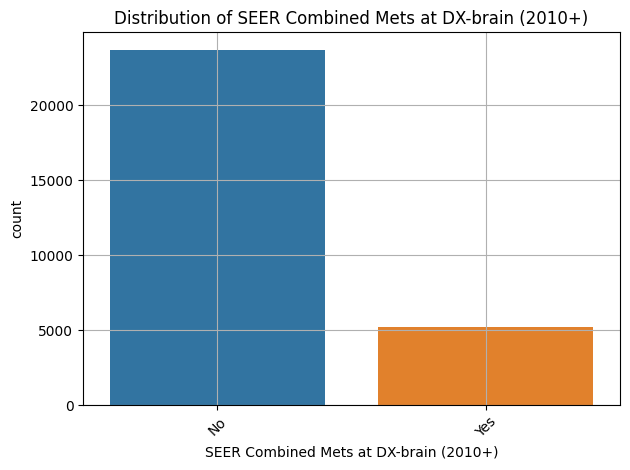

In [134]:
data_exploration(df_final,'SEER Combined Mets at DX-brain (2010+)')

In [135]:
# renmae SEER Combined Mets at DX-brain (2010+) to Brain Metastasis
df_final.rename(columns={'SEER Combined Mets at DX-brain (2010+)': 'Brain Metastasis'}, inplace=True)

# map Brain Metastasis to 1: Yes and 0: No
df_final['Brain Metastasis'] = df_final['Brain Metastasis'].map({'Yes': 1, 'No': 0})

SEER Combined Mets at DX-liver (2010+)

Counts and percentages of unique values in SEER Combined Mets at DX-liver (2010+):
                                        Count  Percentage
SEER Combined Mets at DX-liver (2010+)                   
No                                      19737    68.33668
Yes                                      9145    31.66332


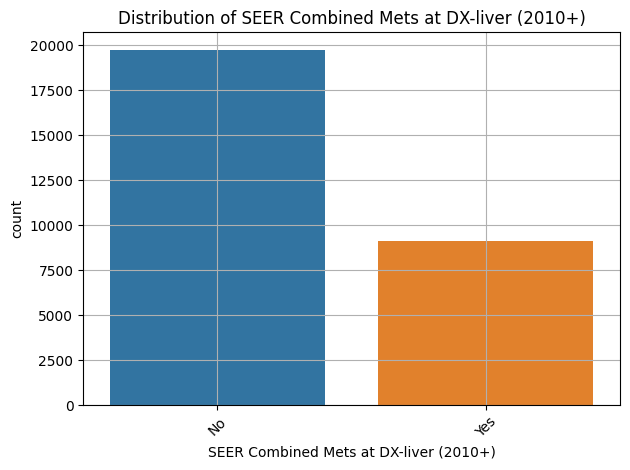

In [136]:
data_exploration(df_final,'SEER Combined Mets at DX-liver (2010+)')

In [137]:
# rename SEER Combined Mets at DX-liver (2010+) to Liver Metastasis
df_final.rename(columns={'SEER Combined Mets at DX-liver (2010+)': 'Liver Metastasis'}, inplace=True)

# map Liver Metastasis to 1: Yes and 0: No
df_final['Liver Metastasis'] = df_final['Liver Metastasis'].map({'Yes': 1, 'No': 0})

SEER Combined Mets at DX-lung (2010+)

Counts and percentages of unique values in SEER Combined Mets at DX-lung (2010+):
                                       Count  Percentage
SEER Combined Mets at DX-lung (2010+)                   
No                                     24796    85.85278
Yes                                     4086    14.14722


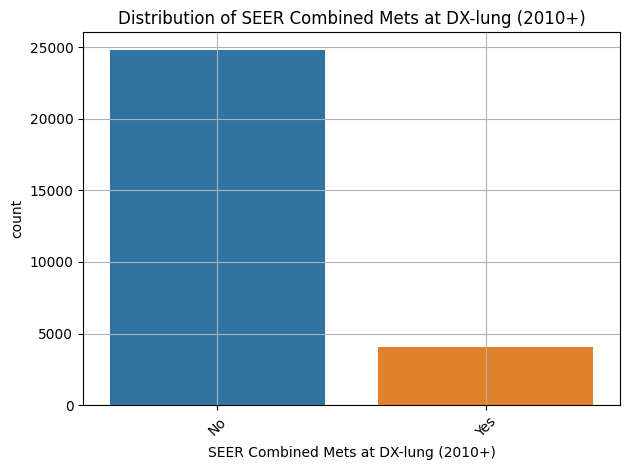

In [138]:
data_exploration(df_final,'SEER Combined Mets at DX-lung (2010+)')

In [139]:
# rename SEER Combined Mets at DX-lung (2010+) to Lung Metastasis
df_final.rename(columns={'SEER Combined Mets at DX-lung (2010+)': 'Lung Metastasis'}, inplace=True)

# map Lung Metastasis to 1: Yes and 0: No
df_final['Lung Metastasis'] = df_final['Lung Metastasis'].map({'Yes': 1, 'No': 0})

T

Counts and percentages of unique values in T:
    Count  Percentage
T                    
T4  10560   36.562565
T2   7306   25.296032
T3   6364   22.034485
T1   4652   16.106918


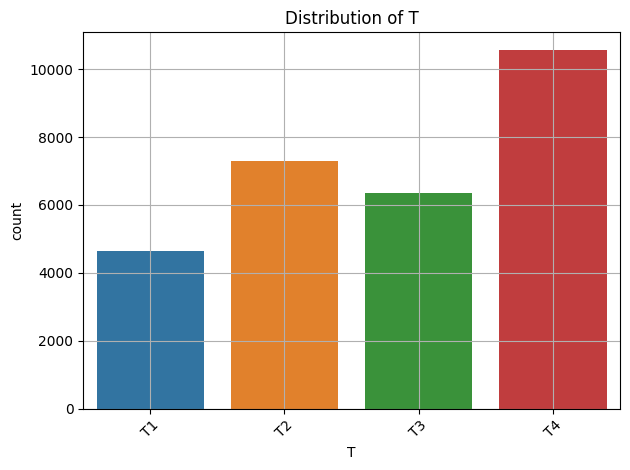

In [140]:
data_exploration(df_final,'T')

N

Counts and percentages of unique values in N:
    Count  Percentage
N                    
N2  15674   54.269095
N3   6448   22.325324
N0   4482   15.518316
N1   2278    7.887265


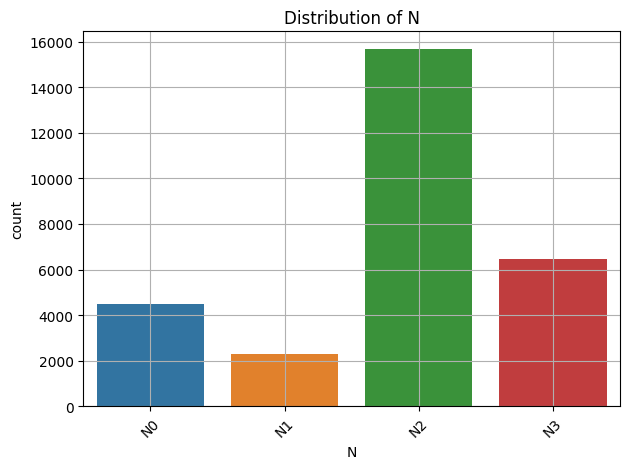

In [141]:
data_exploration(df_final,'N')

M

Counts and percentages of unique values in M:
    Count  Percentage
M                    
M1  19818   68.617132
M0   9064   31.382868


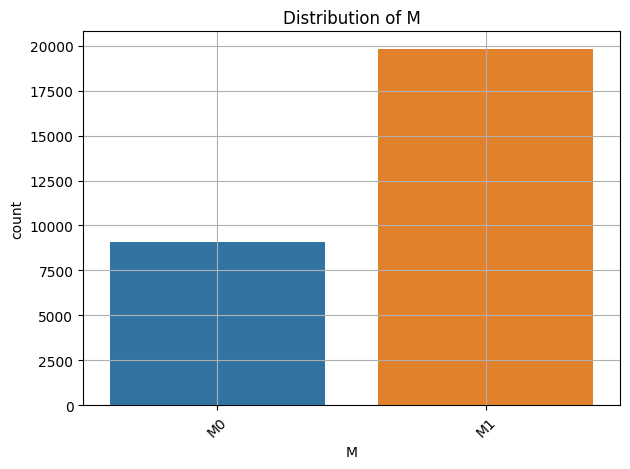

In [142]:
data_exploration(df_final,'M')

Grouped Stage

Counts and percentages of unique values in Grouped Stage:
               Count  Percentage
Grouped Stage                   
IV             19818   68.617132
III             6926   23.980334
I               1115    3.860536
II              1023    3.541998


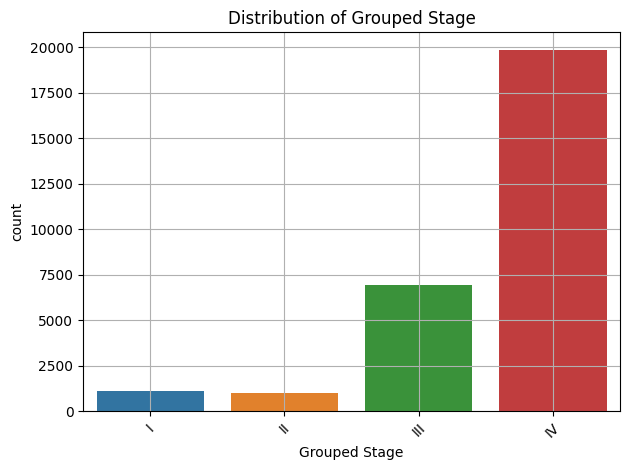

In [143]:
data_exploration(df_final,'Grouped Stage')

Chemotherapy

Counts and percentages of unique values in Chemotherapy:
              Count  Percentage
Chemotherapy                   
1             20599   71.321238
0              8283   28.678762


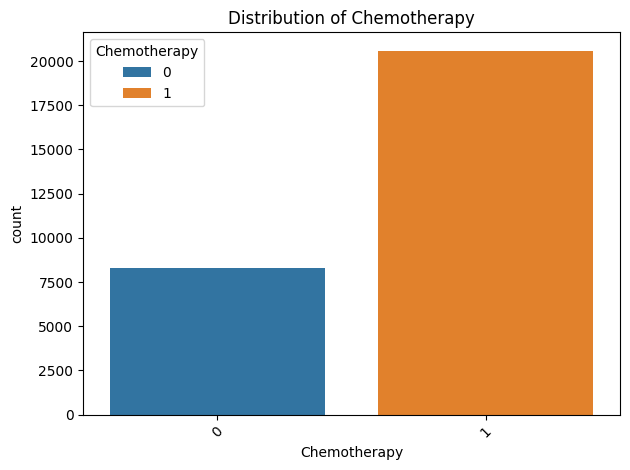

In [144]:
data_exploration(df_final,'Chemotherapy')

Tumor Size

Mean of Tumor Size: 54.33
Median of Tumor Size: 48.00
Standard deviation of Tumor Size: 45.81
Mode of Tumor Size: 50
Number of outliers in Tumor Size: 407
Number of extreme outliers in Tumor Size: 61


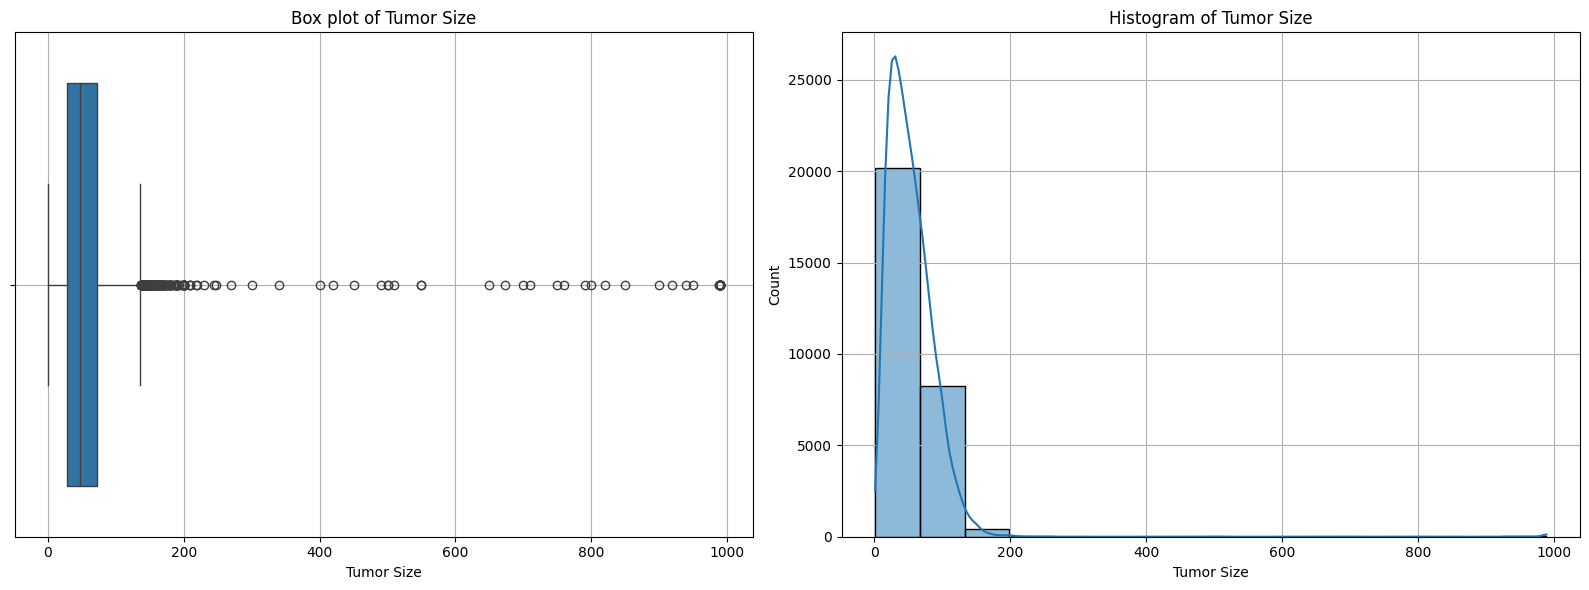

In [145]:
data_exploration(df_final,'Tumor Size')

Surgery

Counts and percentages of unique values in Surgery:
         Count  Percentage
Surgery                   
0        22880   79.218891
1         6002   20.781109


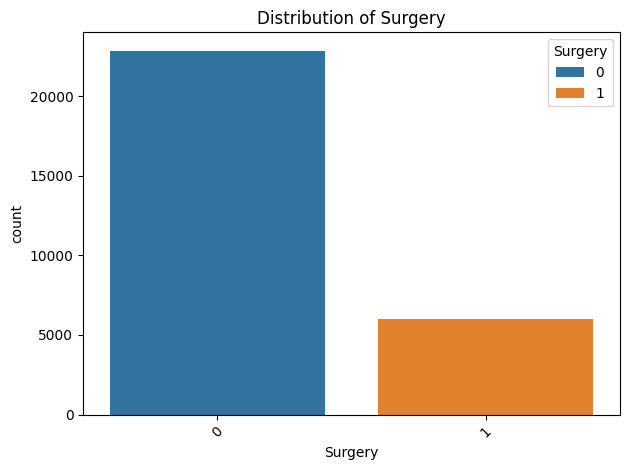

In [146]:
data_exploration(df_final,'Surgery')

Age

Counts and percentages of unique values in Age:
             Count  Percentage
Age                           
65-69 years   5599   19.385777
70-74 years   5224   18.087390
60-64 years   4583   15.868015
75-79 years   4080   14.126446
55-59 years   3241   11.221522
80-84 years   2474    8.565889
50-54 years   1669    5.778686
85+ years     1246    4.314106
45-49 years    580    2.008171
20-44 years    186    0.644000


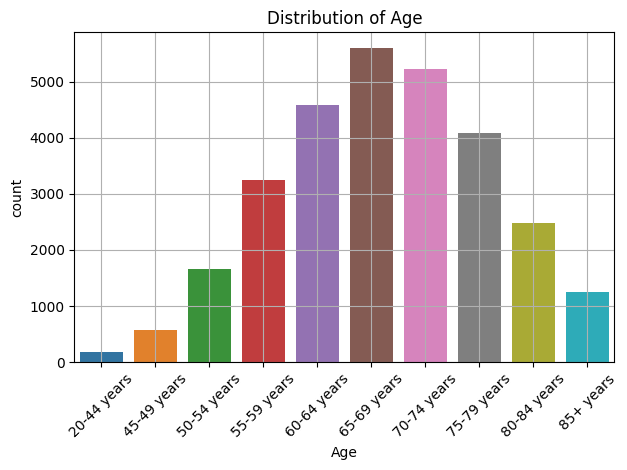

In [147]:
data_exploration(df_final,'Age')

In [148]:
display(df_final.head(2), df_final.shape)

,Patient ID,Histologic Type ICD-O-3,Year of diagnosis,Sex,Race,Radiation recode,Bone Metastasis,Brain Metastasis,Liver Metastasis,Lung Metastasis,T,N,M,Grouped Stage,Chemotherapy,Tumor Size,Surgery,Age,Survival Months,Survival Months Group
26,194350,0,2010,Female,Black,1,0,0,0,0,T4,N1,M1,IV,1,46,0,75-79 years,14,12-24 months
54,674026,0,2010,Female,White,0,0,0,0,0,T2,N2,M0,III,1,50,0,60-64 years,66,Over 24 months


(28882, 20)

In [149]:
df_final.dtypes

Patient ID                    int64
Histologic Type ICD-O-3       int64
Year of diagnosis             int64
Sex                        category
Race                         object
Radiation recode              int64
Bone Metastasis            category
Brain Metastasis           category
Liver Metastasis           category
Lung Metastasis            category
T                          category
N                          category
M                          category
Grouped Stage              category
Chemotherapy                  int64
Tumor Size                    int32
Surgery                       int32
Age                        category
Survival Months               int32
Survival Months Group      category
dtype: object

In [150]:
# save the final dataframe to csv
df_final.to_csv('Data\SEER_Final_Data_vf1_cleaned.csv', index=False)

drop Patient ID, Year of diagnosis, Survival Months or Survival Months Group

Histogram order by count

drop Na = False

colors